In [11]:
#import Statment
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [12]:
features=["feature1","feature2","feature3","feature4","feature5"]
classes=["0","1"]

## Dataset
Format:
- each row is an example.
- The last column is the class(GC=1 or Non-GC=0).
- The first 5 columns are features.

In [3]:
# Load Data
SSD0training = pd.read_csv('./data/data0.csv')
SSD1training = pd.read_csv('./data/data1.csv')
SSD2training = pd.read_csv('./data/data2.csv')
SSD3training = pd.read_csv('./data/data3.csv')

SSD0training.head()

,feature1,feature2,feature3,feature4,feature5,Class
0,24,80,8,18,4,1
1,24,44,12,18,4,0
2,24,42,8,24,12,0
3,10,44,8,28,12,1
4,14,30,10,24,4,1


In [4]:
SSD0X=SSD0training.iloc[:,:-1]
SSD0Y=SSD0training["Class"]
SSD1X=SSD1training.iloc[:,:-1]
SSD1Y=SSD1training["Class"]
SSD2X=SSD2training.iloc[:,:-1]
SSD2Y=SSD2training["Class"]
SSD3X=SSD3training.iloc[:,:-1]
SSD3Y=SSD3training["Class"]

## Construct a decision tree for each SSD

In [5]:
model0 = DecisionTreeClassifier(random_state=0, max_features=5,min_samples_split=2)
model1 = DecisionTreeClassifier(random_state=0, max_features=5,min_samples_split=2)
model2 = DecisionTreeClassifier(random_state=0, max_features=5,min_samples_split=2)
model3 = DecisionTreeClassifier(random_state=0, max_features=5,min_samples_split=2)

SSD0Tree=model0.fit(SSD0X, SSD0Y)
SSD1Tree=model1.fit(SSD1X, SSD1Y)
SSD2Tree=model2.fit(SSD2X, SSD2Y)
SSD3Tree=model3.fit(SSD3X, SSD3Y)

SSD0Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

SSD0


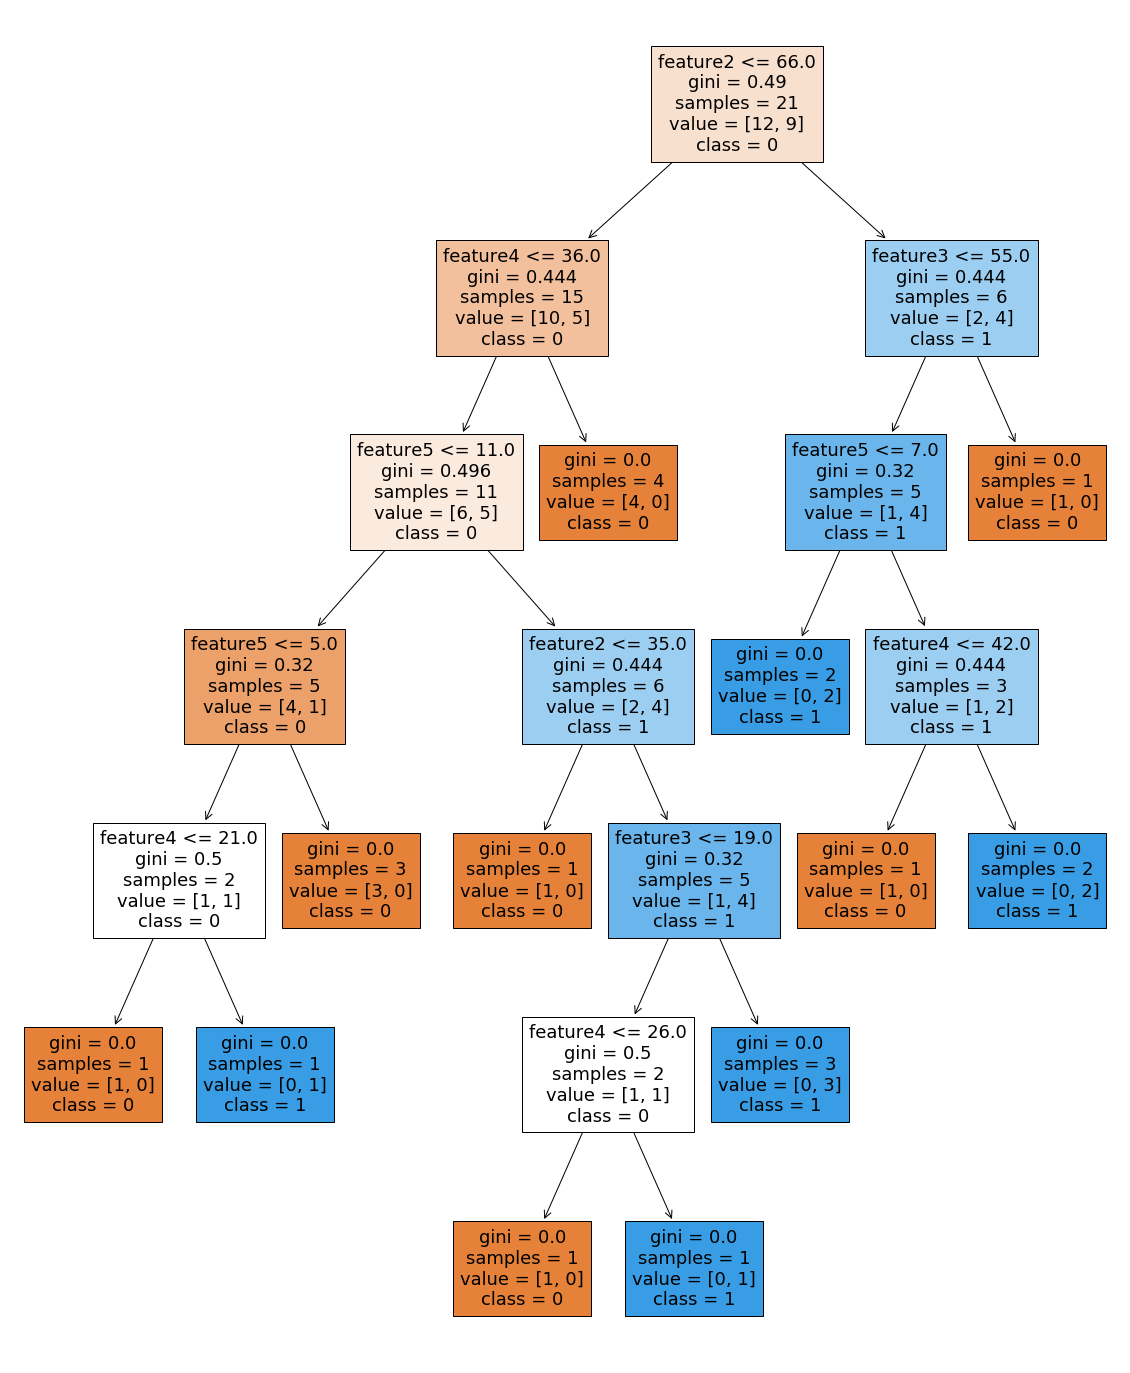

In [6]:
print("SSD0")
tree0fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(SSD0Tree,feature_names=features,class_names=classes,filled=True)
tree0fig.savefig("decistion_tree0.png")


SSD1


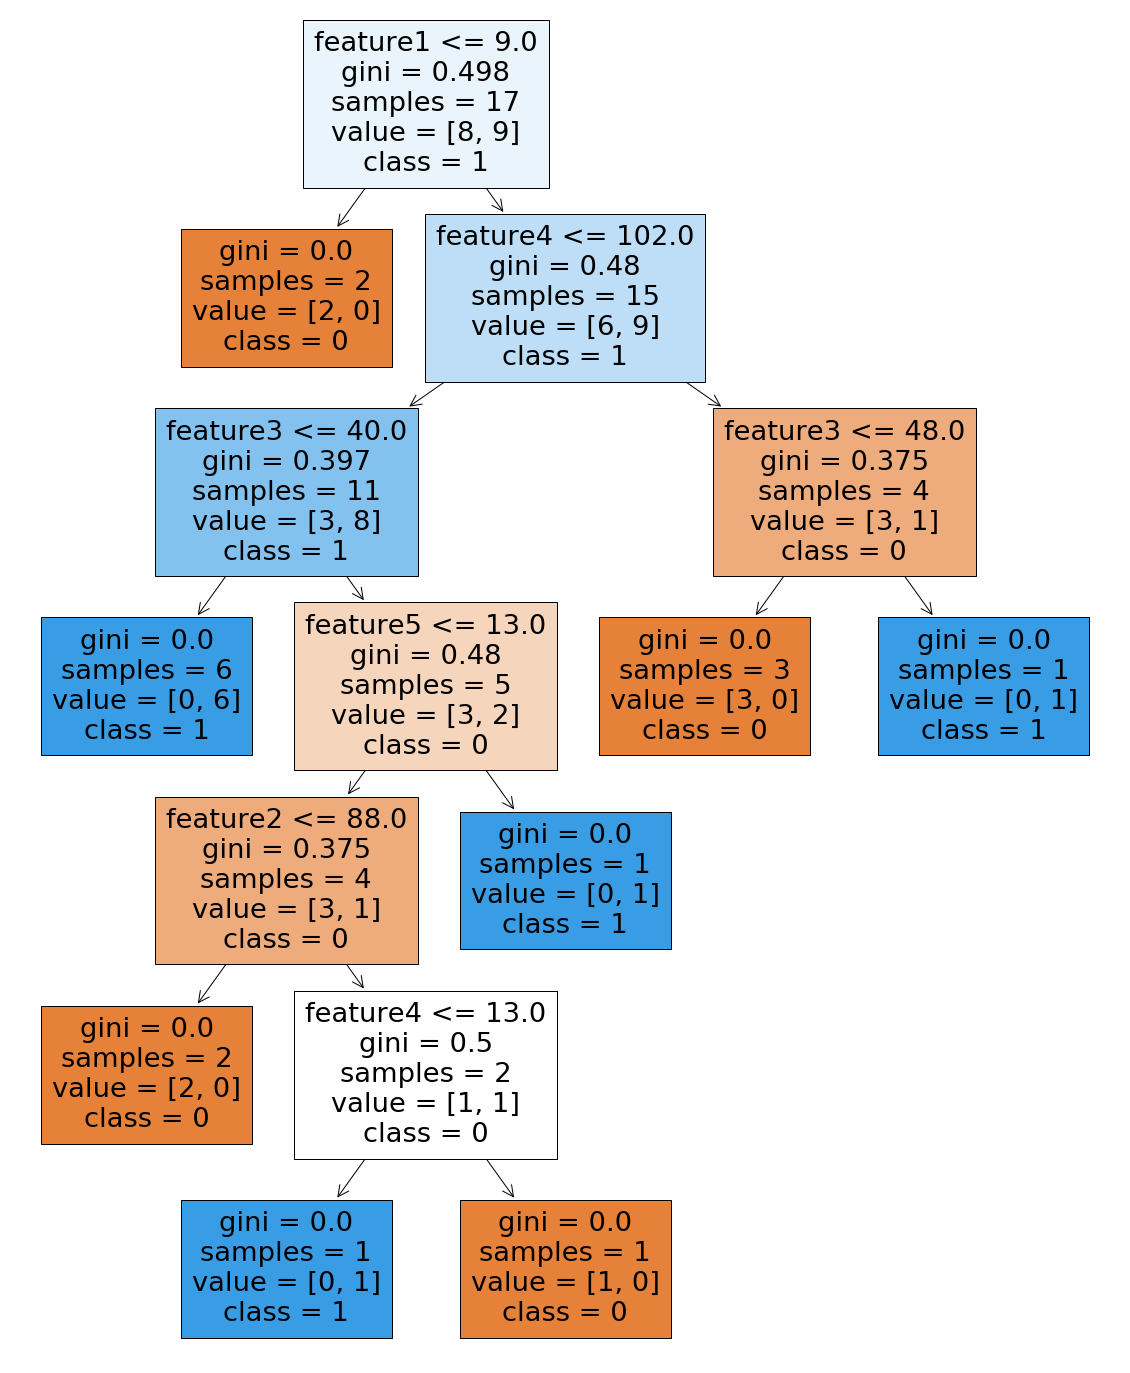

In [7]:
print("SSD1")
tree1fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(SSD1Tree,feature_names=features,class_names=classes,filled=True)
tree1fig.savefig("decistion_tree1.png")


SSD2


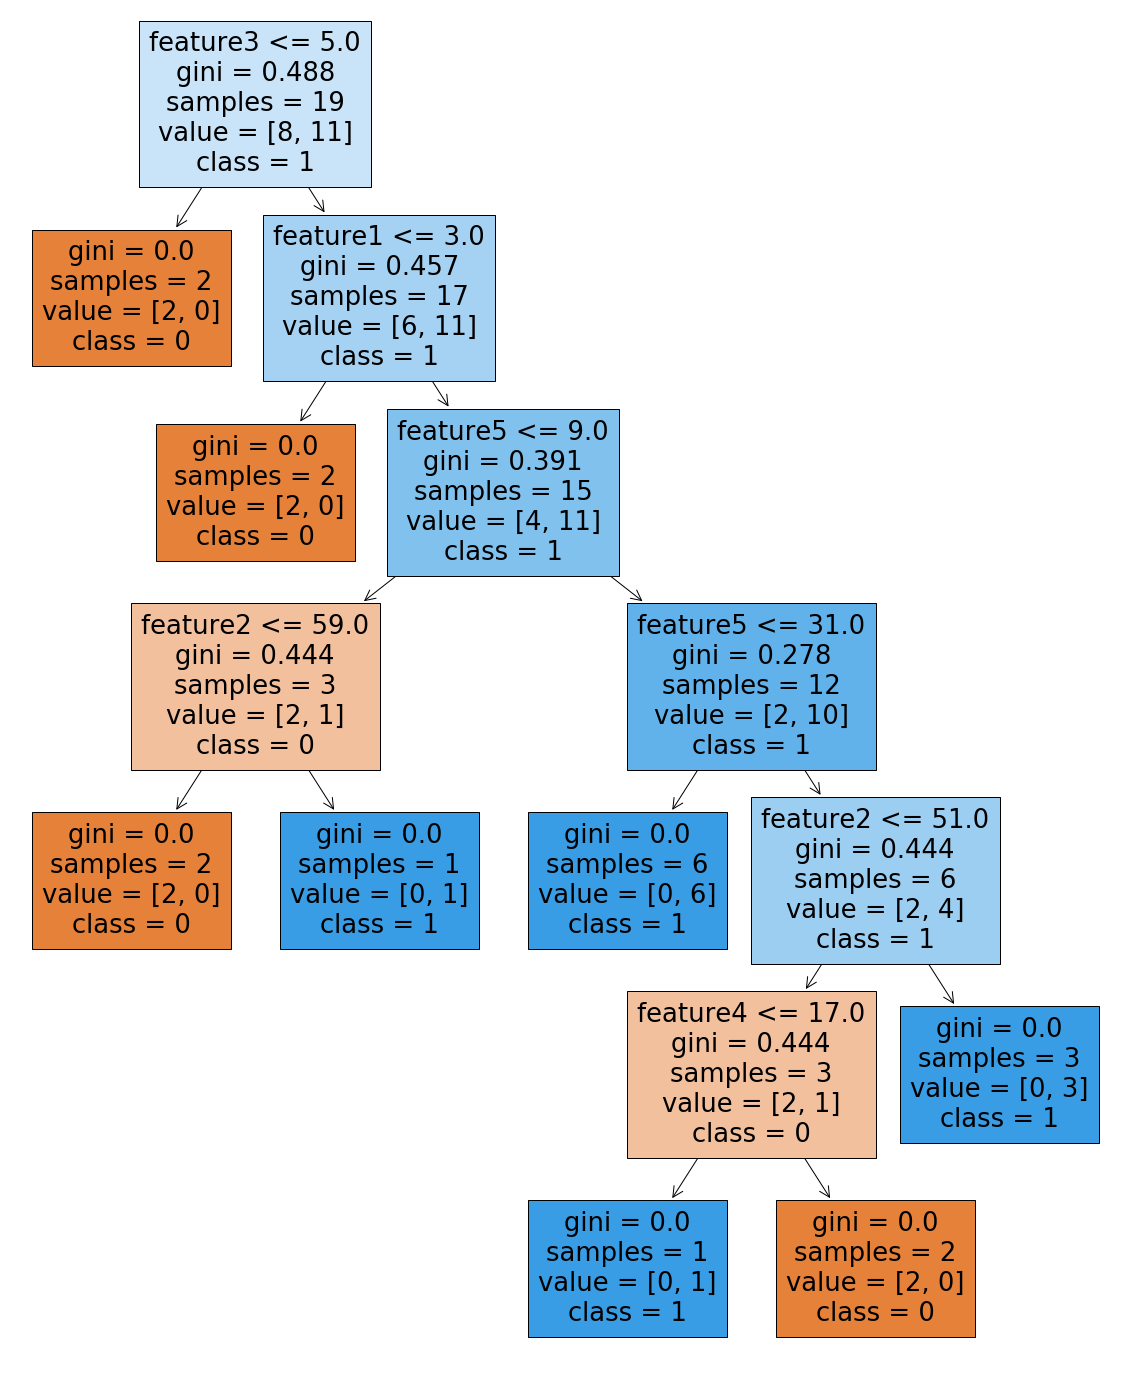

In [8]:
print("SSD2")
tree2fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(SSD2Tree,feature_names=features,class_names=classes,filled=True)
tree2fig.savefig("decistion_tree2.png")


SSD3


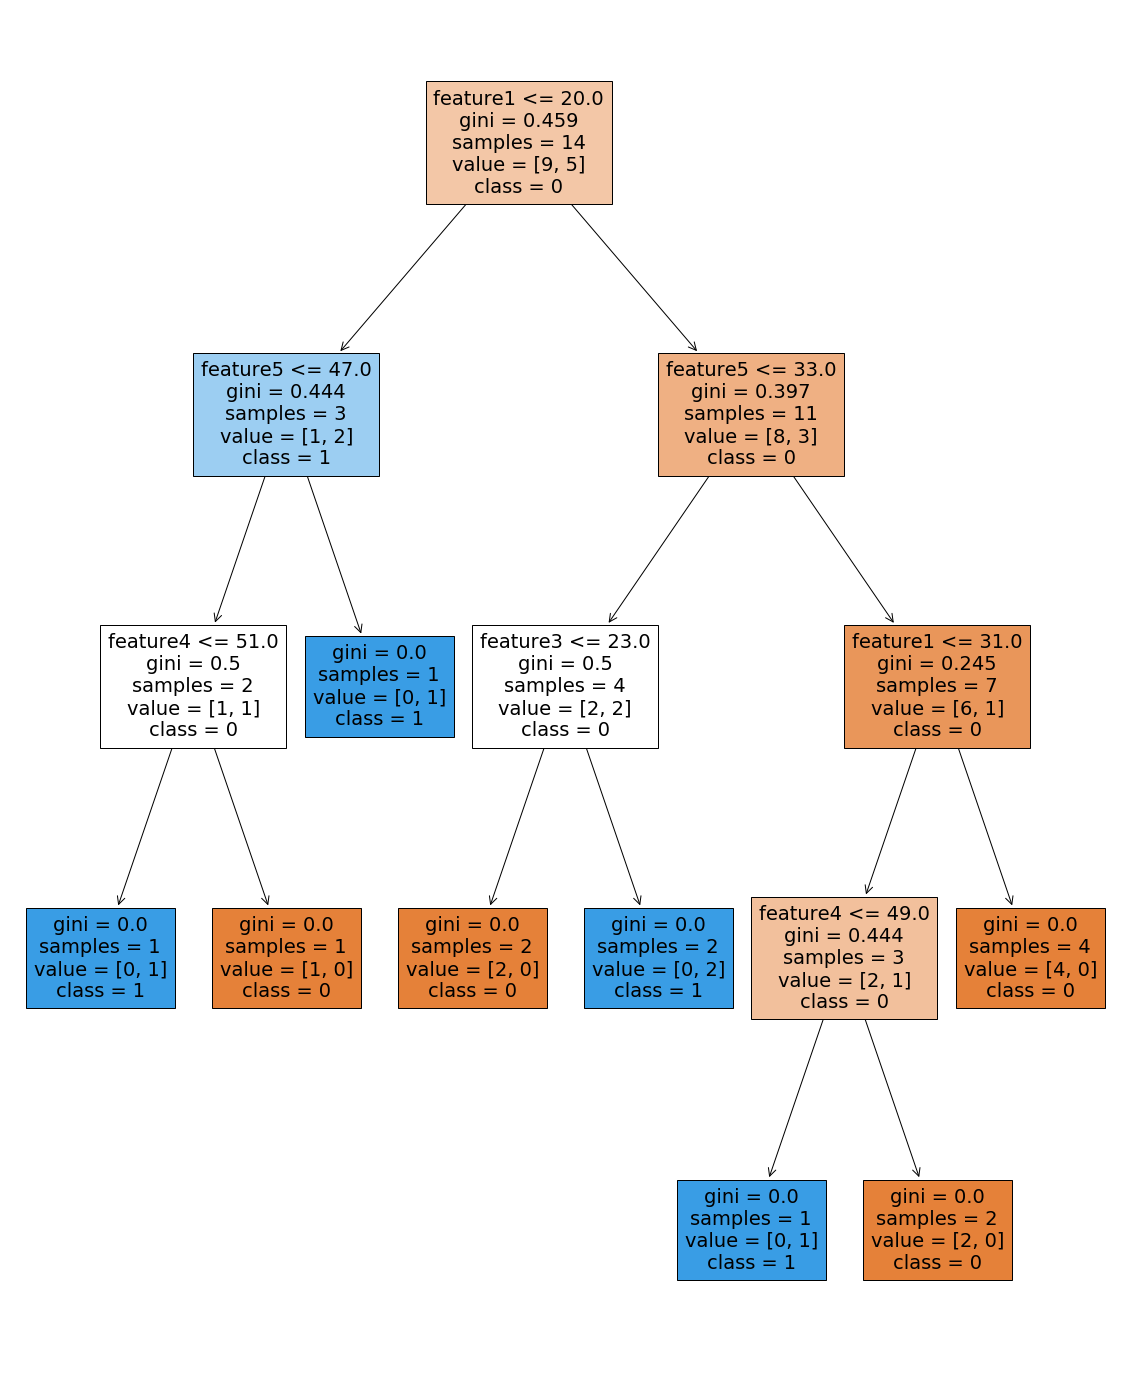

In [9]:
print("SSD3")
tree3fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(SSD3Tree,feature_names=features,class_names=classes,filled=True)
tree3fig.savefig("decistion_tree3.png")

## TestData
Format: the output of Iostat

- The first column is the SSD.
- The other columns are the features.

In [10]:
TestData = pd.read_csv('./data/testdata.csv')
TestData

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5
0,sd1,2,8,75,78,8
1,sd2,41,68,8,25,57
2,sd3,2,58,25,55,25


In [11]:
predict={}
predict["sd1"]=SSD1Tree.predict(TestData.iloc[0:1,1:])
predict["sd2"]=SSD2Tree.predict(TestData.iloc[1:2,1:])
predict["sd3"]=SSD3Tree.predict(TestData.iloc[2:3,1:])
predict

{'sd1': array([0], dtype=int64),
 'sd2': array([1], dtype=int64),
 'sd3': array([0], dtype=int64)}

In [39]:
TestData.iloc[0:1,1:]

,feature1,feature2,feature3,feature4,feature5
0,2,8,75,78,8


In [116]:
tree0 = pd.read_csv('./data/input.csv')
invec={}
for i in range(1,16):
    invec[i-1]=tree0.iloc[(i-1):i,0:20]


In [117]:
invec[2].iloc[:,5:10]

,SSD1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,13,113,43,11,7


In [118]:
predictsd0={}
predictsd1={}
predictsd2={}
predictsd3={}


for i in range(1,15):
    predictsd0[i]=SSD0Tree.predict(invec[i].iloc[:,0:5])
    predictsd1[i]=SSD1Tree.predict(invec[i].iloc[:,5:10])
    predictsd2[i]=SSD2Tree.predict(invec[i].iloc[:,10:15])
    predictsd3[i]=SSD3Tree.predict(invec[i].iloc[:,15:20])
    
predictsd0


{1: array([1], dtype=int64),
 2: array([0], dtype=int64),
 3: array([0], dtype=int64),
 4: array([1], dtype=int64),
 5: array([1], dtype=int64),
 6: array([0], dtype=int64),
 7: array([1], dtype=int64),
 8: array([0], dtype=int64),
 9: array([1], dtype=int64),
 10: array([0], dtype=int64),
 11: array([0], dtype=int64),
 12: array([1], dtype=int64),
 13: array([0], dtype=int64),
 14: array([1], dtype=int64)}